<a href="https://colab.research.google.com/github/Lexx2023/myfirstproject/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22itogovaya_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving img002_copy.jpg to img002_copy (6).jpg

(32, 32, 3)
(1, 32, 32, 3)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 128)       36992     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 4, 4, 64)          73792     
                                              

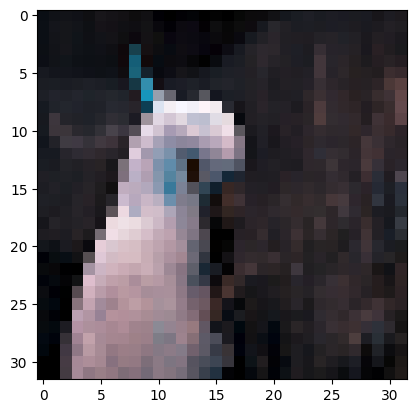

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from PIL import Image, ImageDraw
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Шаг 1: Загрузка данных
# 1.1. Загрузка данных CIFAR-10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 1.2. Подготовка данных
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Шаг 2: Создание сверточной нейронной сети
# 2.1. Импорт библиотек
model = models.Sequential()

uploaded = files.upload()

#img=Image.open(BytesIO(uploaded['img002_copy.jpg']))
# img = Image.open('img002_copy.jpg')
img1 = cv2.imread('img002_copy.jpg')
print()
plt.imshow(img1)
x = np.array(img1)
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
# 2.2. Создание сверточной нейронной сети
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
print(model.summary())
# Шаг 3: Обучение сверточной нейронной сети
# 3.1. Настройка параметров обучения
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3.2. Обучение модели
model.fit(train_images, train_labels, epochs=15, batch_size=64, validation_split=0.2)

# Шаг 4: Оценка производительности модели
# 4.1. Оценка на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Точность на тестовых данных :", test_acc)
print("Потери на тестовых данных: ", test_loss)
res = model.predict(x)
print(np.argmax(res))